# 第四章：变换三维对象

In [1]:
%load_ext autoreload
%autoreload 2
from vectors import *

注意：本章的大多数示例代码位于本目录下的其他 .py 文件中，而不是直接写在这个 Notebook 里。你可以在 Notebook 中运行这些外部文件，运行后会弹出一个 PyGame 窗口。
例如，输入命令：

In [2]:
import sys
!{sys.executable} -m pip install pygame PyOpenGL PyOpenGL_accelerate Pillow

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
    --------------------------------------- 0.3/10.6 MB ? eta -:--:--
   -- ------------------------------------- 0.8/10.6 MB 2.8 MB/s eta 0:00:04
   ------ --------------------------------- 1.8/10.6 MB 3.4 MB/s eta 0:00:03
   --------- ------------------------------ 2.6/10.6 MB 3.5 MB/s eta 0:00:03
   ------------ --------------------------- 3.4/10.6 MB 3.7 MB/s eta 0:00:02
   --------------- ------------------------ 4.2/10.6 MB 3.6 MB/s eta 0:00:02
   ------------------- -------------------- 5.2/10.6 MB 3.8 MB/s eta 0:00:02
   ---------------------- ----------------- 6.0/10.6 MB 3.9 MB/s eta 0:00:02
   --------------------------- ------------ 7.3/10.6 MB 4.0 MB/s eta 0:00:01
   -------------------------------- ------- 8.7/10.6 MB 4.3 MB/s eta 0:00:01
   ----------------

验证安装是否成功

## 4.1 变换三维对象

### 4.1.1 绘制变换后的对象

In [1]:
# P105页 伪代码
def transform(v):
    old_x, old_y, old_z = v
    # 这里做了一些处理
    return (new_x, new_y, new_z)

In [10]:
!python draw_teapot.py

pygame 2.6.1 (SDL 2.28.4, Python 3.12.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [3]:
!python scale_teapot.py

pygame 2.6.1 (SDL 2.28.4, Python 3.12.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [4]:
!python scale_translate_teapot.py

pygame 2.6.1 (SDL 2.28.4, Python 3.12.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


### 4.1.2 组合向量变换

In [5]:
def compose(f1,f2):
    def new_function(input):
        return f1(f2(input))
    return new_function

In [6]:
def polygon_map(transformation, polygons):
    return [
        [transformation(vertex) for vertex in triangle] for triangle in polygons
    ]

In [6]:
def scale_by(scalar):
    def new_function(v):
        return scale(scalar, v)
    return new_function

### 4.1.3 绕轴旋转对象

In [7]:
!python rotate_teapot.py

pygame 1.9.4
Hello from the pygame community. https://www.pygame.org/contribute.html


In [7]:
!python rotate_teapot.py

pygame 2.6.1 (SDL 2.28.4, Python 3.12.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [8]:
def rotate_x(angle, vector):
    x,y,z = vector
    new_y, new_z = rotate2d(angle, (y,z))
    return x, new_y, new_z

def rotate_x_by(angle):
    def new_function(v):
        return rotate_x(angle,v)
    return new_function

In [11]:
!python rotate_teapot_x.py

pygame 2.6.1 (SDL 2.28.4, Python 3.12.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


### 4.1.4 创造属于你自己的几何变换

In [1]:
def stretch_x(vector):
    x,y,z = vector
    return (4.*x, y, z)

In [2]:
!python stretch_teapot.py

pygame 2.6.1 (SDL 2.28.4, Python 3.12.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [3]:
!python stretch_teapot_y.py

pygame 2.6.1 (SDL 2.28.4, Python 3.12.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [4]:
!python cube_teapot.py

pygame 2.6.1 (SDL 2.28.4, Python 3.12.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [5]:
def slant_xy(vector):
    x,y,z = vector
    return (x+y, y, z)

In [6]:
!python slant_teapot.py

pygame 2.6.1 (SDL 2.28.4, Python 3.12.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


### 4.1.5 练习

#### **练习4.1** 实现一个translate_by函数（4.1.2节中有所提及），以一个平移向量作为输入并返回一个平移函数作为输出。

In [8]:
def translate_by(vector):
    def new_function(v):
        x,y=vector[0], vector[1]
        return (x*v, y*v)
    return new_function

a = translate_by((3,4))(5)
a

(15, 20)

In [9]:
def translate_by(translation):
    def new_function(v):
        return add(translation, v)
    return new_function

#### **练习4.2** 渲染沿z轴负方向平移了20个单位的茶壶，产生的图像是什么样的？

In [12]:
!python translate_teapot_x_-20.py

pygame 2.6.1 (SDL 2.28.4, Python 3.12.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


#### **练习4.3（小项目）** 当按0和1之间的标量缩放每一个向量时，茶壶会发生什么变化？按系数-1缩放，又会发生什么变化？

In [13]:
!python scale_teapot_0.5.py

pygame 2.6.1 (SDL 2.28.4, Python 3.12.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [14]:
!python scale_teapot_-1.py

pygame 2.6.1 (SDL 2.28.4, Python 3.12.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


#### **练习4.4** 对茶壶首先应用translate1left，然后应用scale2。结果与相反的组合顺序有什么不同？为什么会这样？

先translate1left然后scale2

In [17]:
!python translate_scale_teapot.py

pygame 2.6.1 (SDL 2.28.4, Python 3.12.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


先scale2然后translate1left

In [18]:
!python scale_translate_teapot.py

pygame 2.6.1 (SDL 2.28.4, Python 3.12.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


#### **练习4.5** compose(scale_by(0.4), scale_by(1.5))变换的效果是什么？

In [21]:
!python scale_teapot_1.5_0.4.py

pygame 2.6.1 (SDL 2.28.4, Python 3.12.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


解：把一个向量依次按系数1.5和0.4进行缩放，净缩放系数为0.6。得到的图像将是原始大小的60%。

#### **练习4.6** 将compose(f,g)函数修改为compose(*args)，它将几个函数作为参数，并返回一个新的函数，即它们的组合。

In [22]:
def compose(*args):
    def new_function(input): #1
        state = input #2
        for f in reversed(args): #3
            state = f(state) #4
        return state
    return new_function

In [23]:
def prepend(string):
    def new_function(input):
        return string + input
    return new_function

f = compose(prepend("P"), prepend("y"), prepend("t"))

In [24]:
f("hon")

'Python'

#### **练习4.7** 实现函数curry2(f)，接收一个有两个参数的Python函数f(x,y)，并返回一个柯里化版本。例如，对于g =curry2(f)，f(x,y)和g(x)(y)应该返回相同的结果。

In [30]:
from vectors import scale
def curry2(f):
    def g(x):
        def new_function(y):
            return f(x, y)
        return new_function
    return g

scale_by=curry2(scale)
scale_by(2)((1,2,3))

(2, 4, 6)

#### **练习4.8** 在不执行代码的情况下，说出变换compose(rotate_z_by(pi/2),rotate_x_by(pi/2))的结果是什么。如果换一下组合的顺序呢？

这里如果绕x轴旋转，那么指的是向屏幕外转

先绕x轴旋转90度，茶壶顶朝向自己，然后绕z轴旋转90度，茶壶顶朝自己，茶壶嘴朝上

调换顺序为compose(rotate_x_by(pi/2)，rotate_z_by(pi/2))

先绕z轴旋转90度，茶壶侧面朝自己，茶壶嘴朝上，然后绕x轴旋转90度，茶壶把手那一侧朝向自己

以下代码为绕x轴旋转90度之后的效果

In [4]:
!python rotate_teapot_x_90.py

pygame 2.6.1 (SDL 2.28.4, Python 3.12.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


在绕z轴旋转90度

In [6]:
!python rotate_teapot_x_90_z_90.py

pygame 2.6.1 (SDL 2.28.4, Python 3.12.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


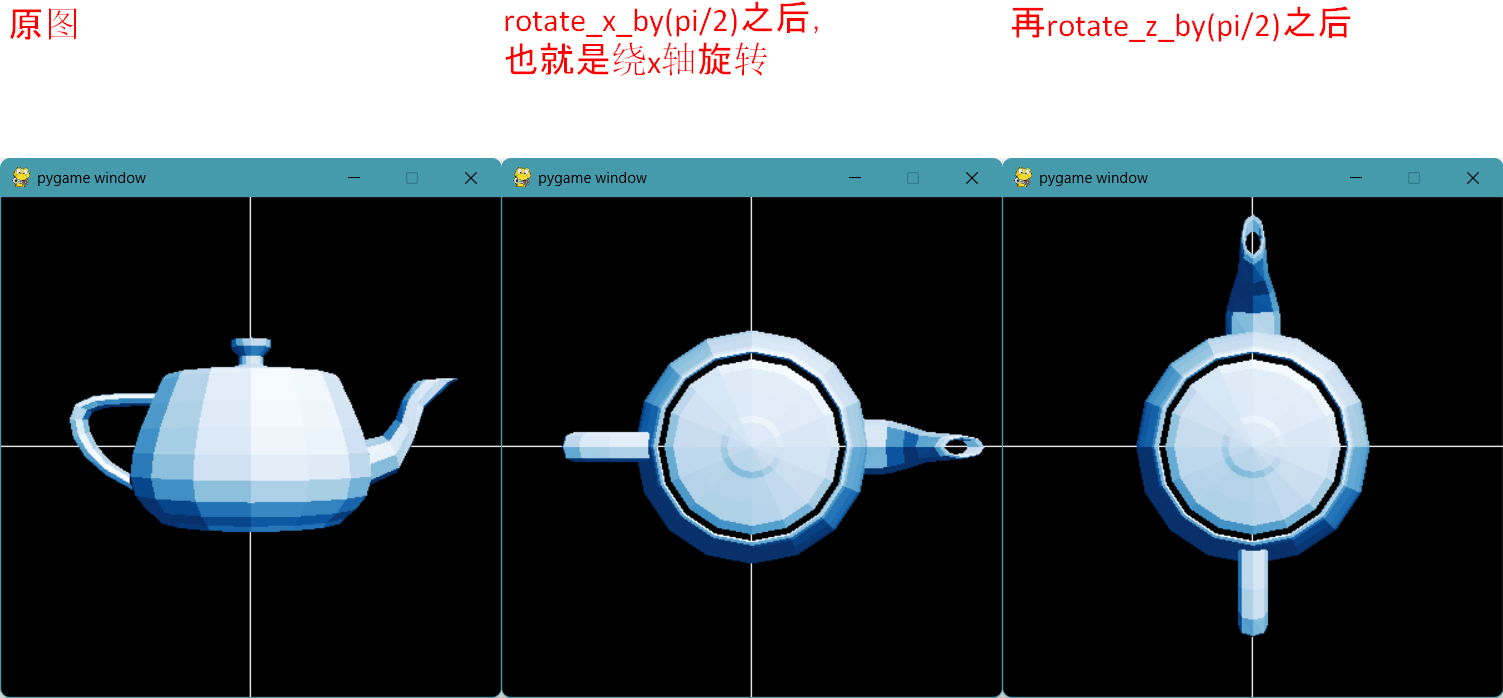

书中答案给"这个组合相当于绕轴顺时针旋转π/2弧度。"是不对的

In [8]:
!python rotate_teapot_y_90.py

pygame 2.6.1 (SDL 2.28.4, Python 3.12.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


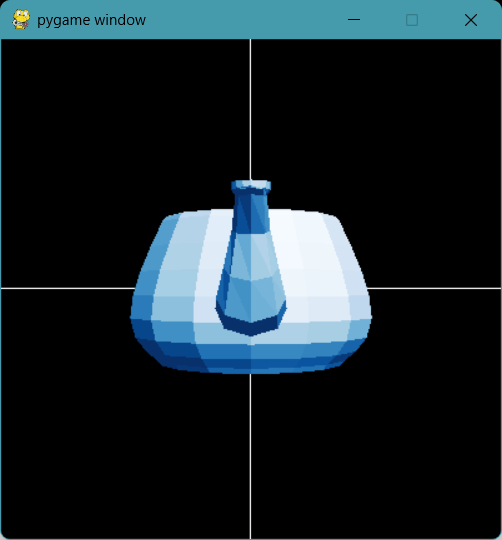

交换顺序

以下代码为绕z轴旋转90度之后的效果

In [9]:
!python rotate_teapot_z_90.py

pygame 2.6.1 (SDL 2.28.4, Python 3.12.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


再绕x轴旋转90度

In [12]:
!python rotate_teapot_z_90_x_90.py

pygame 2.6.1 (SDL 2.28.4, Python 3.12.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


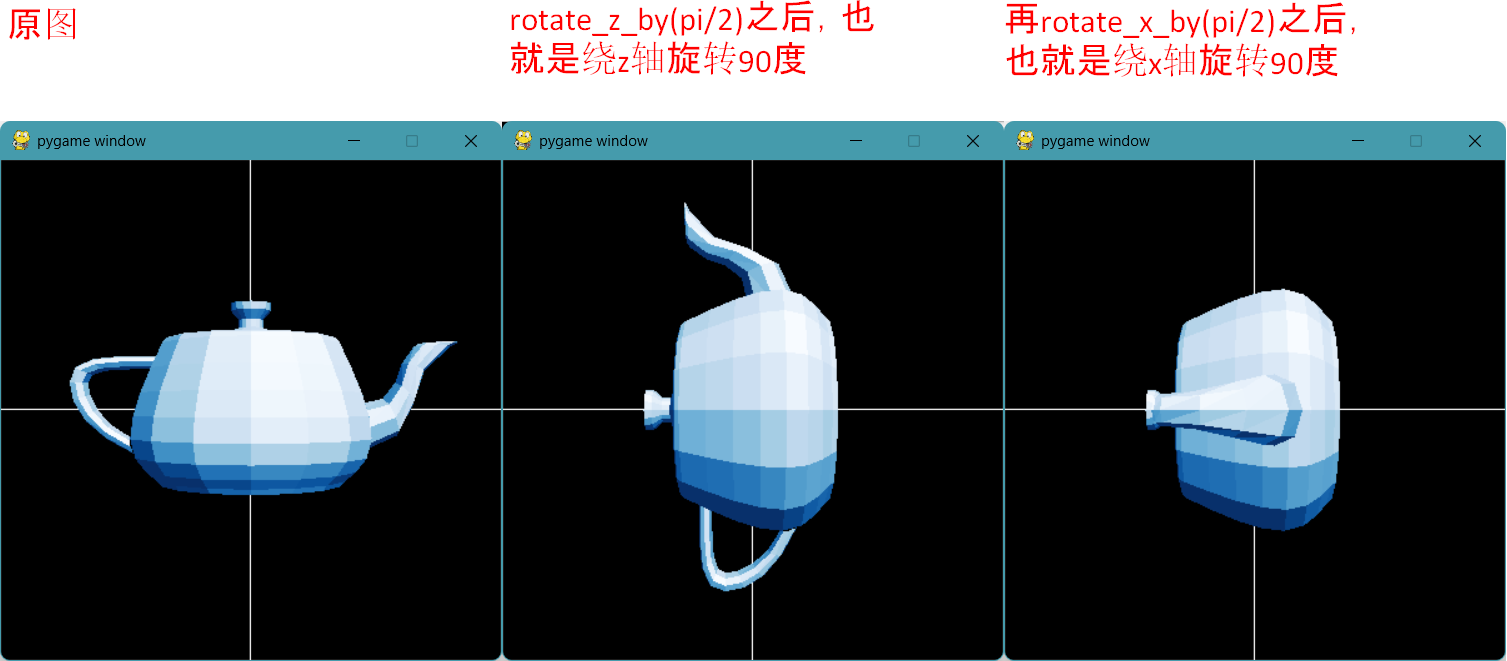

颠倒顺序之后，数中给出的答案：“颠倒顺序，则是绕y轴逆时针旋转π/2弧度。”也是不对的

In [13]:
!python rotate_teapot_y_-90.py

pygame 2.6.1 (SDL 2.28.4, Python 3.12.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


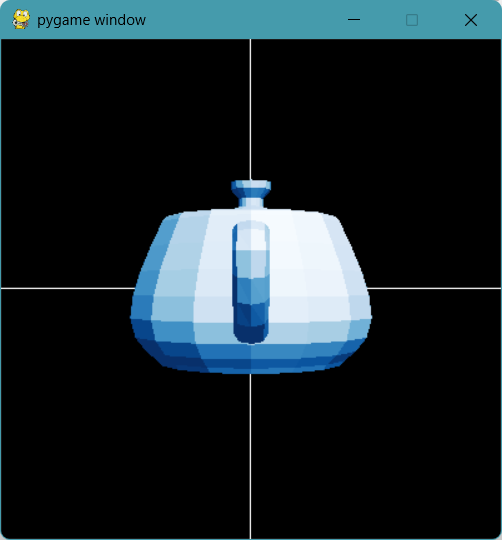

#### **练习4.9** 实现函数stretch_x(scalar,vector)，只在方向上将目标向量按给定系数缩放。同时实现stretch_x_by的柯里化版本，使stretch_x_by(scalar)(vector)返回同样的结果。

In [25]:
def stretch_x(scalar,vector):
    x,y,z = vector
    return (scalar*x, y, z)

In [26]:
def stretch_x_by(scalar):
    def new_function(vector):
        return stretch_x(scalar,vector)
    return new_function


In [27]:
stretch_x(5,(1,2,3))

(5, 2, 3)

In [28]:
stretch_x_by(5)((1,2,3))

(5, 2, 3)

In [14]:
!python stretch_teapot.py

pygame 2.6.1 (SDL 2.28.4, Python 3.12.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


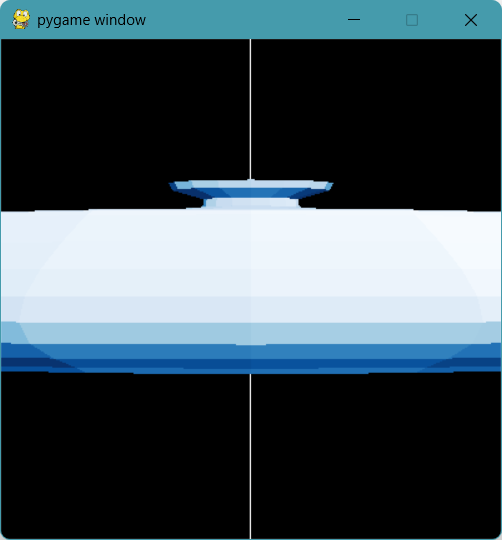

## 4.2 线性变换

### 4.2.1 向量运算的不变性

本节没有代码

### 4.2.2 图解线性变换

本节没有代码

### 4.2.3 为什么要做线性变换

本节没有代码

### 4.2.4 计算线性变换

In [1]:
from vectors import add,scale

Ae1 = (1,1,1) #1
Ae2 = (1,0,-1)
Ae3 = (0,1,1)

def apply_A(v): #2
    return add( #3
        scale(v[0], Ae1),
        scale(v[1], Ae2),
        scale(v[2], Ae3)
    )

In [2]:
!python linear_transform_teapot.py

pygame 2.6.1 (SDL 2.28.4, Python 3.12.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


### 4.2.5 练习

#### **练习4.10** 再考虑对所有坐标执行二次方运算的向量变换$S$，用代数方法证明 $S(sv)=sS(v)$并不是对所有标量$s$和二维向量$v$都成立。

令$v=(x, y)$, 那么：
$$
\begin{aligned}
S(sv)=S(sx, sy)=(s^2x^2, s^2y^2) \\
sS(v)=s(x^2, y^2)=(sx^2, sy^2)
\end{aligned}
$$
只有当s=0或s=1时，对于任意x,y成立
或者当s!=0时，只对x，y等于0或1或-1时成立

#### **练习4.11** 假设$T$是一个向量变换，且$T(0)\ne0$ ，其中$0$代表所有坐标都等于零的向量。根据定义，$T$为什么是非线性的？

解：对于任意向量$v$，$v+0=v$。$T$保持向量加法，应满足$T(v+0)=T(v)+T(0)$。因为 ，这就要求$T(0)=0$ 。鉴于情况并非如此， 不可能是线性的。

#### **练习4.12** 恒等变换是返回向量与接收向量相同的向量变换，用大写的$I$表示。因此，对于所有向量$v$ ，其定义写成$I(v)=v$。为什么$I$是一个线性变换？

解：对于任意向量$v$和$v$，$I(v+w)=I(v)+I(w)=v+w$ ；对于任意标量 $s$，$I(sv)=sI(v)=sv$ 。这些等价性表明，恒等变换保持了向量和与标量乘积。

#### **练习4.13** (5, 3)和(-2, 1)之间的中点是什么？把这三个点都画出来，看看你的做法是否正确。

解：中点是1/2(5, 3) + 1/2(-2, 1)或(5/2, 3/2) + (-1, 1/2)，等于(3/2, 2)。可以按比例画出来看看正确性，如图4-41所示。
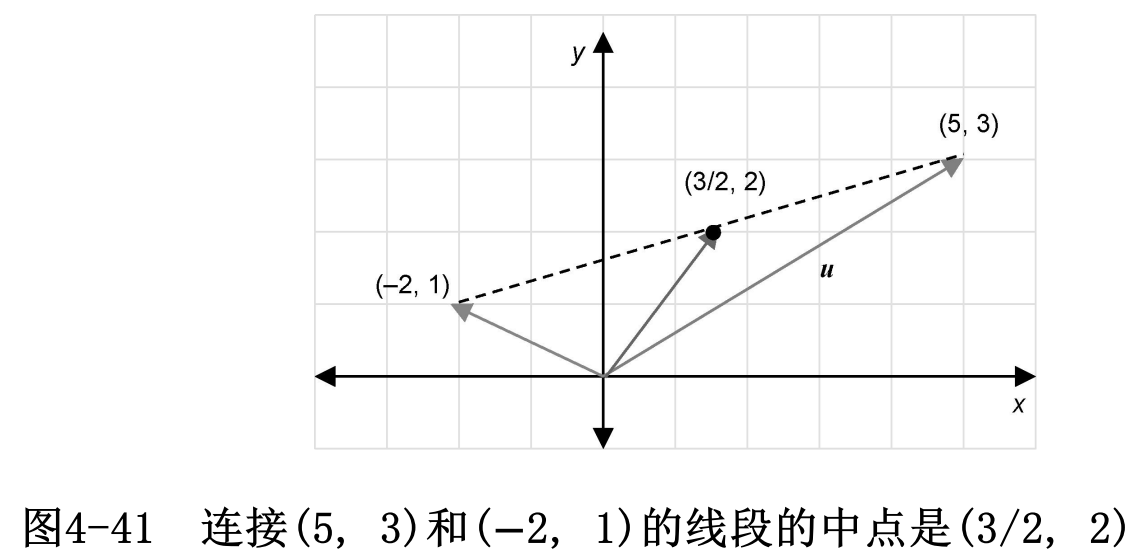

#### **练习4.14** 再考虑把$v=(x, y)$转移到$(x^2, y^2)$的非线性变换$S(v)$。用第2章的绘图代码将整数坐标为0～5的36个向量$v$全部绘制成点，然后分别绘制它们的$S(v)$。在$S$的作用下，向量在几何上会发生什么？

解：开始时，点与点之间的空间是均匀的，但在变换后的图片中，随着x坐标和y坐标的增大，点与点之间在水平和垂直方向上的间距也分别增大了

In [6]:
vectors = [ (x, y) for y in range(0, 6) for x in range(0, 6)]
draw(Points(*vectors))
vectors_square = [ (x*x, y*y) for y in range(0, 6) for x in range(0, 6)]
draw(Points(*vectors_square))

NameError: name 'draw' is not defined

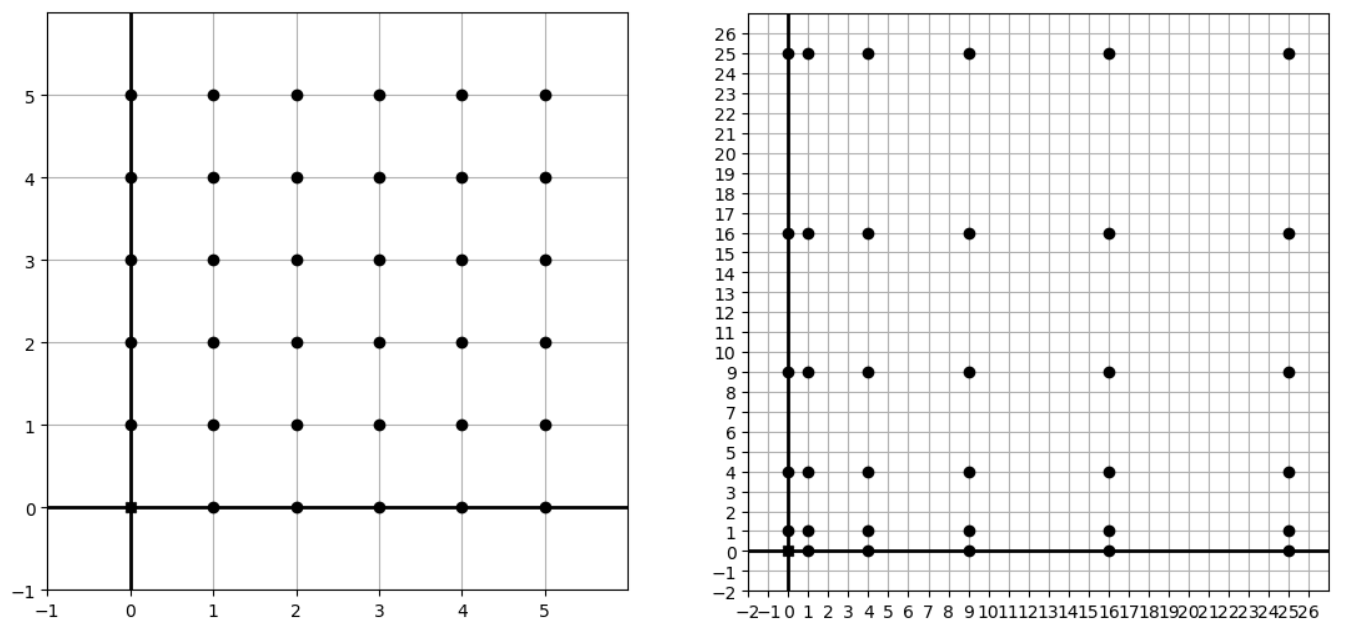

#### **练习4.15（小项目）** 基于属性的测试是一种单元测试，涉及为程序创造任意输入数据，然后检查输出是否满足所需条件。一些流行的Python库，如Hypothesis（可通过pip获得），可以很容易地配置它。使用你选择的库，实现基于属性的测试来检查向量变换是否是线性的。具体来说，给定一个以Python函数形式实现的向量变换$T$，生成大量随机向量对，并对所有这些向量断言，$T$会保持它们的和。然后，对每组标量和向量做同样的事情，来确定$T$保持了标量乘积。应该可以发现，像rotate_x_by(pi/2)这样的线性变换可以通过测试，但是像坐标-平方变换这样的非线性变换不能通过。

In [21]:
import math
from math import sqrt, sin, cos, acos, atan2
import random

def length(v):
    return sqrt(sum([coord ** 2 for coord in v]))

def to_cartesian(polar_vector):
    length, angle = polar_vector[0], polar_vector[1]
    return (length*cos(angle), length*sin(angle))

def to_polar(vector):
    x, y = vector[0], vector[1]
    angle = atan2(y,x)
    return (length(vector), angle)

def rotate2d(angle, vector):
    l,a = to_polar(vector)
    return to_cartesian((l, a+angle))

def rotate_x(angle, vector):
    x,y,z = vector
    new_y, new_z = rotate2d(angle, (y,z))
    return x, new_y, new_z

def rotate_x_by(angle):
    def new_function(v):
        return rotate_x(angle,v)
    return new_function

def test_linearity(transform_func, n_tests=1000, tol=1e-9):
    """测试变换是否保持加法和标量乘法"""
    for _ in range(n_tests):
        # 随机生成两个三维向量
        u = [random.uniform(-10, 10) for _ in range(3)]
        v = [random.uniform(-10, 10) for _ in range(3)]
        s = random.uniform(-5, 5)
        
        # 计算 T(u + v) 与 T(u) + T(v)
        left_sum = transform_func(tuple(u[i] + v[i] for i in range(3)))
        right_sum = tuple(transform_func(u)[i] + transform_func(v)[i] for i in range(3))
        
        # 计算 T(su) 与 s * T(u)
        left_scalar = transform_func(tuple(s * u[i] for i in range(3)))
        right_scalar = tuple(s * transform_func(u)[i] for i in range(3))
        
        # 判断误差
        def close(a, b):
            return all(abs(a[i] - b[i]) < tol for i in range(3))
        
        if not close(left_sum, right_sum) or not close(left_scalar, right_scalar):
            return False
    return True
T_linear = rotate_x_by(math.pi / 2)
print("rotate_x_by(pi/2) 是线性变换吗？", test_linearity(T_linear))

def square_transform(v):
    return tuple(x ** 2 for x in v)

print("square_transform 是线性变换吗？", test_linearity(square_transform))

def add_transform(v):
    return tuple(x + 10 for x in v)
print("add_transform 是线性变换吗？", test_linearity(add_transform))

rotate_x_by(pi/2) 是线性变换吗？ True
square_transform 是线性变换吗？ False
add_transform 是线性变换吗？ False


#### **练习4.16** 二维向量变换是相对于$x$轴的镜像，这种变换接收一个向量并返回其相对于$x$轴的镜像向量。它应该保持$x$坐标不变，改变$y$坐标符号。将这种变换称为$S_x$ ，图4-43展示了向量$v=(3,2)$和变换后的向量$S_x(v)$。画出这两个向量、它们的和，以及这三个向量的镜像，来证明这种变换保持了向量和。再画出另一张图，同样证明这种变换保持了标量乘积，从而证明线性的两个标准。


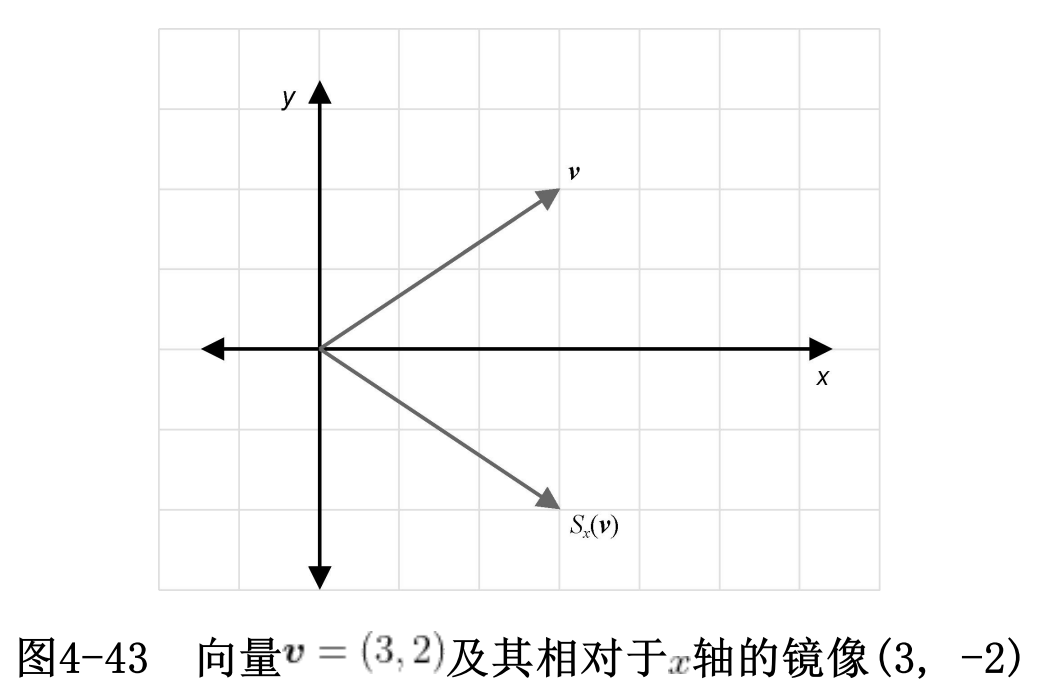

解：图4-44是一个相对于$x$轴镜像的示例，它保持了向量和。

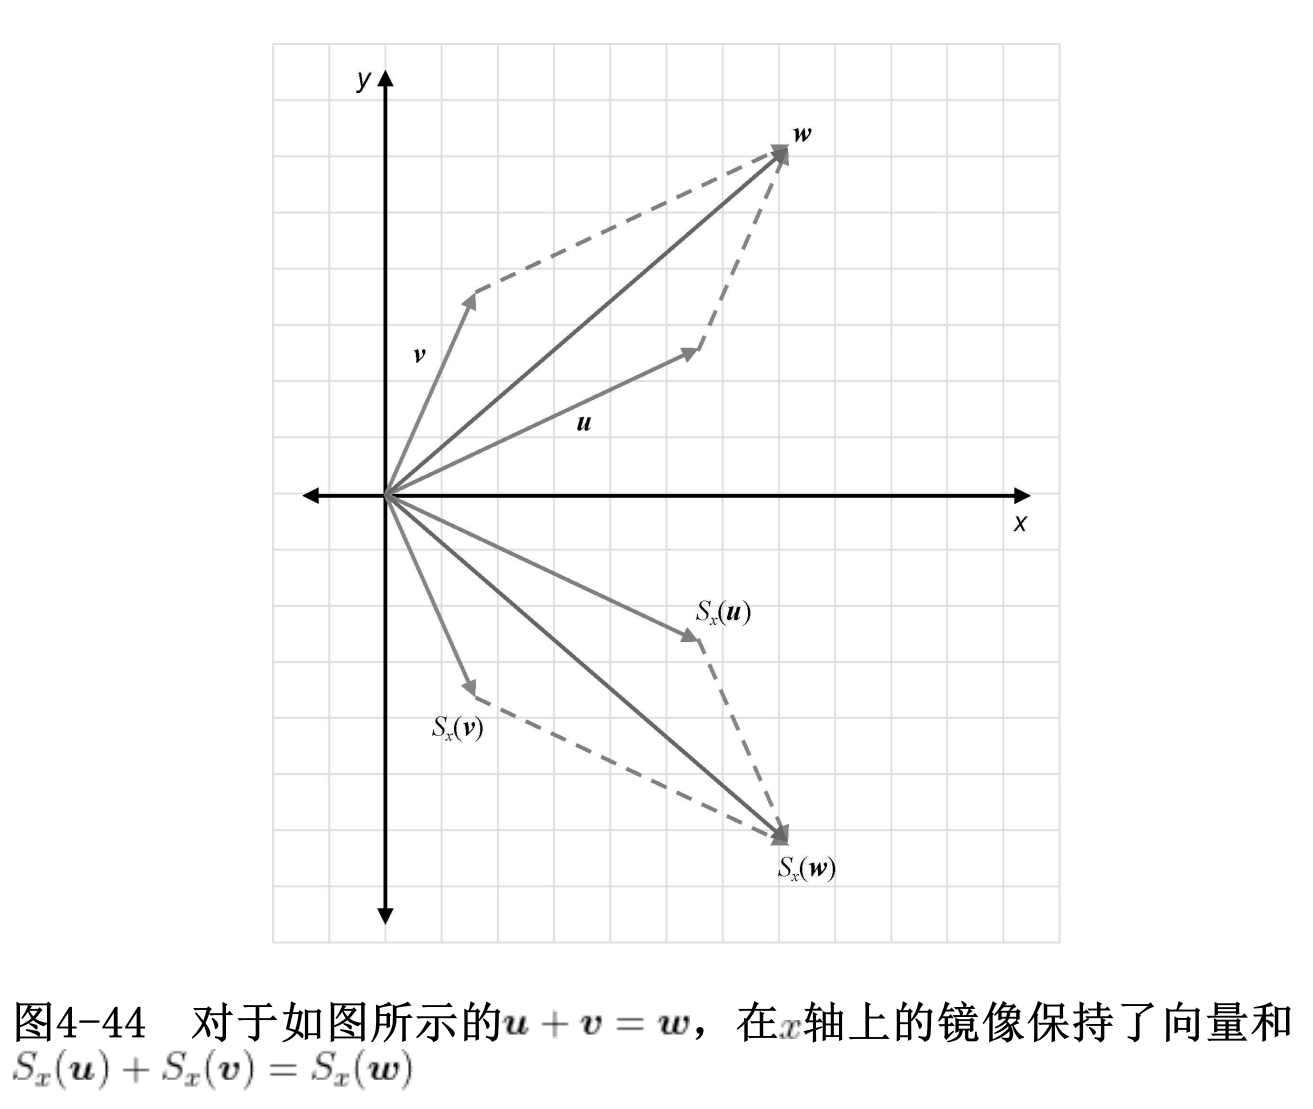

图4-45中的示例显示镜像保持了标量乘积： $S_x(sv)$位于$sS_x(v)$的预期位置。

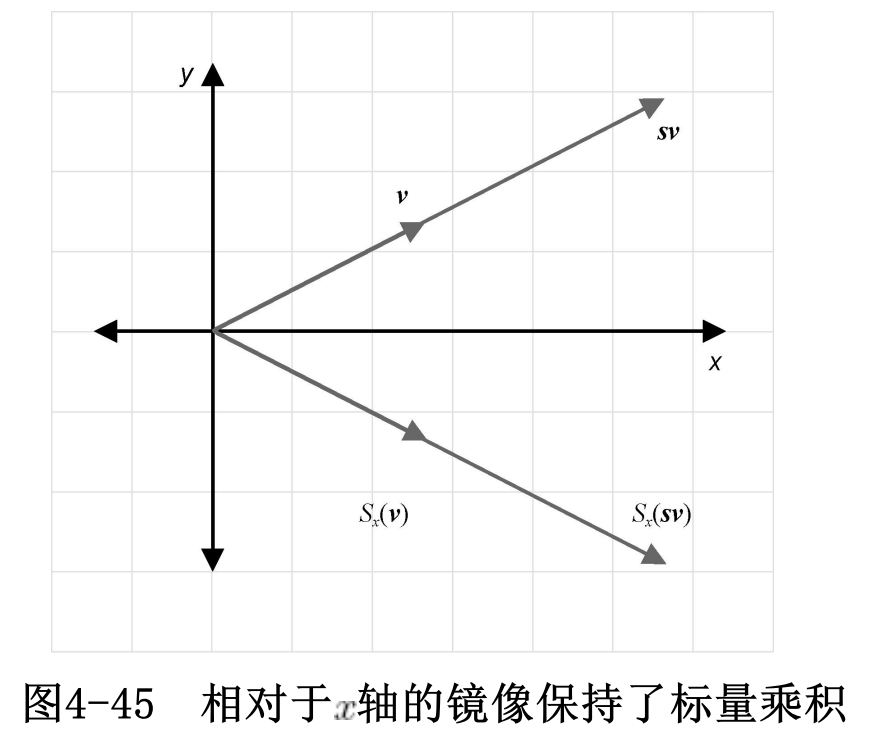

#### **练习4.17（小项目）** 假设$S$和$T$都是线性变换。解释为什么$S$和$T$的组合也是线性的。

解：如果对于任意向量和$u+v=w$，有$S(T(u)) + S(T(v)) = S(T(w))$，而且对于任意标量乘积$sv$，有$S(T(sv))=s \dot S(T(v))$，则组合$S(T(v))$是线性的。这只是一个必须被满足的定义声明。

现在来看它为什么为真。首先，假设对于任意给定输入向量$u$和$v$，有$u+v=w$。那么由于$T$是线性的，亦知$T(u)+T(v)=T(w)$。因为此向量和是成立的，所以$S$的线性告诉我们，它在下被保持了：$S(T(u))+S(T(v))=S(T(w))$。这意味着$S(T(v))$保持了向量和。

同样，对于任意标量乘积$sv$，$T$的线性告诉我们$s \dot T(V)=T(sv)$。根据$S$的线性，$s \dot S(T(v)) = S(T(sv))$也是如此。这意味着$S(T(v))$保持了标量乘积，因此$S(T(v))$满足前面所说的线性的全部定义。可以得出结论，两个线性变换的组合是线性的。

#### **练习4.18** 设$T$是Python函数rotate_**x**_by(pi/2)所做的线性变换，那么$T(e_1)$、$T(e_2)$和$T(e_3)$分别是什么？

注意是绕x轴旋转90度

$$
\begin{align}
T(e_1) &= (1, 0, 0) \\
T(e_2) &= (0, 0, -1) \\
T(e_3) &= (0, -1, 0)
\end{align}
$$

#### **练习4.19** 实现函数linear_combination(scalars, * vectors)，接收一个标量列表和相同数量的向量，并返回一个向量。例如，linear_combination([1,2,3], (1,0,0),(0,1,0), (0,0, 1))应该返回$1 · (1,0,0) + 2 · (0,1,0) + 3 · (0,0,1)$，即(1, 2, 3)。

In [5]:
def linear_combination(scalars, *vectors):
    l = [scale(i[0], i[1]) for i in zip(scalars, vectors)]
    return add(*l)
linear_combination([1,2,3], (1,0,0), (0,1,0), (0,0,1)) 

(1, 2, 3)

#### **练习4.20** 编写函数transform_standard_basis(transform)，将一个三维向量变换作为输入，并输出它对标准基的影响。它应该输出一个由3个向量组成的元组，这些向量是transform分别作用于、和的结果。

In [7]:
import math
from math import sqrt, sin, cos, acos, atan2
import random

def length(v):
    return sqrt(sum([coord ** 2 for coord in v]))

def to_cartesian(polar_vector):
    length, angle = polar_vector[0], polar_vector[1]
    return (length*cos(angle), length*sin(angle))

def to_polar(vector):
    x, y = vector[0], vector[1]
    angle = atan2(y,x)
    return (length(vector), angle)

def rotate2d(angle, vector):
    l,a = to_polar(vector)
    return to_cartesian((l, a+angle))

def rotate_x(angle, vector):
    x,y,z = vector
    new_y, new_z = rotate2d(angle, (y,z))
    return x, new_y, new_z

def rotate_x_by(angle):
    def new_function(v):
        return rotate_x(angle,v)
    return new_function

def transform_standard_basis(transform):
    return transform((1,0,0)), transform((0,1,0)), transform((0,0,1))

transform_standard_basis(rotate_x_by(pi/2))

((1, 0.0, 0.0),
 (0, 6.123233995736766e-17, 1.0),
 (0, -1.0, 1.2246467991473532e-16))

#### **练习4.21** 假设$B$是一个线性变换，满足$B(e_1)=(0,0,1)$、$B(e_2)=(2,1,0)$、$B(e_3)=(-1,0,-1)$和$v=(-1,1,2)$。$B(v)$是什么？

$$
\begin{align}
v &= (-1, 1, 2) = -1·e_1 + 1·e_2 + 2·e_3 \\
B(v) &= B(-1, 1, 2) = -1·B(e_1) + 1·B(e_2) + 2·B(e_3) \\
     &= -1·(0,0,1) + 1·(2,1,0) + 2·(-1,0,-1) \\
     &= (0,0,-1) + (2,1,0) + 2·(-2,0,-2) \\
     &= (0,1,3)
\end{align}
$$

#### **练习4.22** 假设$A$和$B$都是线性变换，而且$A(e_1)=(1,1,1)$、$A(e_2)=(1,0,-1)$、$A(e_3)=(0,1,1)$、$B(e_1)=(0,0,1)$、$B(e_2)=(2,1,0)$、$B(e_3)=(-1,0,-1)$。那么$A(B(e_1))$、$A(B(e_2))$和$A(B(e_3))$是什么？

$$
\begin{aligned}
A(e_1)&=(1,1,1), & A(e_2)&=(1,0,-1), & A(e_3)&=(0,1,1),\\
B(e_1)&=(0,0,1), & B(e_2)&=(2,1,0), & B(e_3)&=(-1,0,-1).
\end{aligned}
$$

$$
\begin{aligned}
A(B(e_1)) &= A(0e_1 + 0e_2 + 1e_3)
= 0A(e_1) + 0A(e_2) + 1A(e_3)
= A(e_3) = (0,1,1), \\[6pt]
A(B(e_2)) &= A(2e_1 + 1e_2 + 0e_3)
= 2A(e_1) + 1A(e_2) + 0A(e_3)
= 2(1,1,1) + (1,0,-1)
= (3,2,1), \\[6pt]
A(B(e_3)) &= A(-1e_1 + 0e_2 - 1e_3)
= -A(e_1) - A(e_3)
= -(1,1,1) - (0,1,1)
= (-1,-2,-2).
\end{aligned}
$$

$$
\begin{aligned}
A(B(e_1)) = (0,1,1), \quad
A(B(e_2)) = (3,2,1), \quad
A(B(e_3)) = (-1,-2,-2)
\end{aligned}
$$
